#Fact or Fiction: A Data Mining Exploration of the LIAR Dataset

In [ ]:
# coding=utf-8
# Copyright 2020 The HuggingFace Datasets Authors and the current dataset script contributor.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
"""LIAR is a dataset for fake news detection with annotated claims."""


import csv
import os
!pip install datasets
import datasets


_CITATION = """\
@inproceedings{wang-2017-liar,
title = "{``}Liar, Liar Pants on Fire{''}: A New Benchmark Dataset for Fake News Detection",
author = "Wang, William Yang",
booktitle = "Proceedings of the 55th Annual Meeting of the Association for Computational Linguistics (Volume 2: Short Papers)",
month = jul,
year = "2017",
address = "Vancouver, Canada",
publisher = "Association for Computational Linguistics",
url = "https://www.aclweb.org/anthology/P17-2067",
doi = "10.18653/v1/P17-2067",
pages = "422--426",
abstract = "Automatic fake news detection is a challenging problem in deception detection, and it has tremendous real-world political and social impacts. However, statistical approaches to combating fake news has been dramatically limited by the lack of labeled benchmark datasets. In this paper, we present LIAR: a new, publicly available dataset for fake news detection. We collected a decade-long, 12.8K manually labeled short statements in various contexts from PolitiFact.com, which provides detailed analysis report and links to source documents for each case. This dataset can be used for fact-checking research as well. Notably, this new dataset is an order of magnitude larger than previously largest public fake news datasets of similar type. Empirically, we investigate automatic fake news detection based on surface-level linguistic patterns. We have designed a novel, hybrid convolutional neural network to integrate meta-data with text. We show that this hybrid approach can improve a text-only deep learning model.",
}
"""

_DESCRIPTION = """\
LIAR is a dataset for fake news detection with 12.8K human labeled short statements from politifact.com's API, and each statement is evaluated by a politifact.com editor for its truthfulness. The distribution of labels in the LIAR dataset is relatively well-balanced: except for 1,050 pants-fire cases, the instances for all other labels range from 2,063 to 2,638. In each case, the labeler provides a lengthy analysis report to ground each judgment.
"""

_HOMEPAGE = "https://www.aclweb.org/anthology/P17-2067"

_LICENSE = "Unknown"

_URL = "https://www.cs.ucsb.edu/~william/data/liar_dataset.zip"


class Liar(datasets.GeneratorBasedBuilder):
    """LIAR is a dataset for fake news detection with annotated claims."""

    VERSION = datasets.Version("1.0.0")

    def _info(self):
        return datasets.DatasetInfo(
            description=_DESCRIPTION,
            features=datasets.Features(
                {
                    "id": datasets.Value("string"),
                    "label": datasets.ClassLabel(
                        names=[
                            "false",
                            "half-true",
                            "mostly-true",
                            "true",
                            "barely-true",
                            "pants-fire",
                        ]
                    ),
                    "statement": datasets.Value("string"),
                    "subject": datasets.Value("string"),
                    "speaker": datasets.Value("string"),
                    "job_title": datasets.Value("string"),
                    "state_info": datasets.Value("string"),
                    "party_affiliation": datasets.Value("string"),
                    "barely_true_counts": datasets.Value("float"),
                    "false_counts": datasets.Value("float"),
                    "half_true_counts": datasets.Value("float"),
                    "mostly_true_counts": datasets.Value("float"),
                    "pants_on_fire_counts": datasets.Value("float"),
                    "context": datasets.Value("string"),
                }
            ),
            supervised_keys=("statement", "label"),
            homepage=_HOMEPAGE,
            license=_LICENSE,
            citation=_CITATION,
        )

    def _split_generators(self, dl_manager):
        """Returns SplitGenerators."""

        data_dir = dl_manager.download_and_extract(_URL)
        return [
            datasets.SplitGenerator(
                name=datasets.Split.TRAIN,
                gen_kwargs={
                    "filepath": os.path.join(data_dir, "train.tsv"),
                    "split": "train",
                },
            ),
            datasets.SplitGenerator(
                name=datasets.Split.TEST,
                gen_kwargs={"filepath": os.path.join(data_dir, "test.tsv"), "split": "test"},
            ),
            datasets.SplitGenerator(
                name=datasets.Split.VALIDATION,
                gen_kwargs={
                    "filepath": os.path.join(data_dir, "valid.tsv"),
                    "split": "valid",
                },
            ),
        ]

    def _generate_examples(self, filepath, split):
        """Yields examples."""

        with open(filepath, encoding="utf-8") as tsv_file:
            reader = csv.reader(tsv_file, delimiter="\t", quoting=csv.QUOTE_NONE)
            for id_, row in enumerate(reader):
                yield id_, {
                    "id": row[0],
                    "label": row[1],
                    "statement": row[2],
                    "subject": row[3],
                    "speaker": row[4],
                    "job_title": row[5],
                    "state_info": row[6],
                    "party_affiliation": row[7],
                    "barely_true_counts": row[8],
                    "false_counts": row[9],
                    "half_true_counts": row[10],
                    "mostly_true_counts": row[11],
                    "pants_on_fire_counts": row[12],
                    "context": row[13],
                }


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 4.5 MB/s eta 0:00:00


#Load Test, train, validation split

In [ ]:
import pandas as pd

dataset = datasets.load_dataset('liar', split='train[:100%]')

# Create a DataFrame from the dataset
df = pd.DataFrame(dataset)

df

Generating train split:   0%|          | 0/10269 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1283 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1284 [00:00<?, ? examples/s]

Dataset liar downloaded and prepared to /root/.cache/huggingface/datasets/liar/default/1.0.0/479463e757b7991eed50ffa7504d7788d6218631a484442e2098dabbf3b44514. Subsequent calls will reuse this data.


,id,label,statement,subject,speaker,job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,2635.json,0,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,1,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,2,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,0,Health care reform legislation is likely to ma...,health-care,blog-posting,,,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,1,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10264,5473.json,2,There are a larger number of shark attacks in ...,"animals,elections",aclu-florida,,Florida,none,0.0,1.0,1.0,1.0,0.0,"interview on ""The Colbert Report"""
10265,3408.json,2,Democrats have now become the party of the [At...,elections,alan-powell,,Georgia,republican,0.0,0.0,0.0,1.0,0.0,an interview
10266,3959.json,1,Says an alternative to Social Security that op...,"retirement,social-security",herman-cain,,Georgia,republican,4.0,11.0,5.0,3.0,3.0,a Republican presidential debate
10267,2253.json,0,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy",jeff-greene,,Florida,democrat,3.0,1.0,3.0,0.0,0.0,a televised debate on Miami's WPLG-10 against ...


In [ ]:
dataset = datasets.load_dataset('liar', split='test[:100%]')

# Create a DataFrame from the dataset
dftest = pd.DataFrame(dataset)

dftest

,id,label,statement,subject,speaker,job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,11972.json,3,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30.0,30.0,42.0,23.0,18.0,Radio interview
1,11685.json,0,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2.0,1.0,0.0,0.0,0.0,a news conference
2,11096.json,0,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63.0,114.0,51.0,37.0,61.0,comments on ABC's This Week.
3,5209.json,1,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1.0,1.0,3.0,1.0,1.0,a radio show
4,9524.json,5,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,,Wisconsin,democrat,5.0,7.0,2.0,2.0,7.0,a web video
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,7334.json,1,Says his budget provides the highest state fun...,education,rick-scott,Governor,Florida,republican,28.0,23.0,38.0,34.0,7.0,a news conference
1279,9788.json,4,Ive been here almost every day.,"civil-rights,crime,criminal-justice",jay-nixon,Governor,Missouri,democrat,2.0,0.0,0.0,1.0,0.0,"on ABC's ""This Week"""
1280,10710.json,4,"In the early 1980s, Sen. Edward Kennedy secret...","bipartisanship,congress,foreign-policy,history",mackubin-thomas-owens,"senior fellow, Foreign Policy Research Institute",Rhode Island,columnist,1.0,0.0,0.0,0.0,0.0,a commentary in The Providence Journal
1281,3186.json,4,Says an EPA permit languished under Strickland...,"environment,government-efficiency",john-kasich,"Governor of Ohio as of Jan. 10, 2011",Ohio,republican,9.0,8.0,10.0,18.0,3.0,a news conference


In [ ]:
dataset = datasets.load_dataset('liar', split='validation[:100%]')

# Create a DataFrame from the dataset
dfvalid = pd.DataFrame(dataset)

dfvalid

,id,label,statement,subject,speaker,job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,12134.json,4,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1.0,0.0,1.0,0.0,0.0,an interview with ABC17 News
1,238.json,5,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,,,none,11.0,43.0,8.0,5.0,105.0,
2,7891.json,0,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0.0,1.0,1.0,1.0,0.0,a U.S. Ways and Means hearing
3,8169.json,1,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0.0,1.0,1.0,1.0,0.0,an opinion article
4,929.json,1,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,interview with CBS News
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,3419.json,1,"For the first time in more than a decade, impo...","energy,oil-spill,trade",barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,a press conference
1280,12548.json,2,Says Donald Trump has bankrupted his companies...,candidates-biography,hillary-clinton,Presidential candidate,New York,democrat,40.0,29.0,69.0,76.0,7.0,a speech on the economy
1281,401.json,3,"John McCain and George Bush have ""absolutely n...",health-care,campaign-defend-america,,"Washington, D.C.",none,0.0,1.0,0.0,2.0,0.0,a television ad
1282,1055.json,0,"""A new poll shows 62 percent support the presi...",health-care,americans-united-change,,,none,1.0,4.0,4.0,1.0,0.0,an Internet ad.


In [ ]:
dfvalid.dtypes

id                       object
label                     int64
statement                object
subject                  object
speaker                  object
job_title                object
state_info               object
party_affiliation        object
barely_true_counts      float64
false_counts            float64
half_true_counts        float64
mostly_true_counts      float64
pants_on_fire_counts    float64
context                  object
dtype: object

#Data description and cleaning

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
df['state_info'].unique()

array(['Texas', 'Virginia', 'Illinois', '', 'Florida', 'Wisconsin',
       'New Jersey', 'Vermont', 'Massachusetts', 'Maryland',
       'Washington, D.C. ', 'Oregon', 'New York', 'Washington, D.C.',
       'California', 'Missouri', 'Rhode Island', 'West Virginia',
       'Arkansas', 'New Hampshire', 'Ohio', 'Georgia', 'Arizona',
       'Wyoming', 'Delaware', 'Kentucky', 'Kansas', 'ohio', 'Colorado',
       'North Carolina', 'New Mexico', 'Illinois ', 'Alaska',
       'South Carolina', 'Minnesota', 'Tennessee', 'Pennsylvania', 'Iowa',
       'Connecticut', 'Louisiana', 'Indiana', 'Florida ', 'Utah',
       'Michigan', 'Oklahoma', 'Nevada', 'Oregon ', 'Virgina', 'Nebraska',
       'Georgia ', 'None', 'Washington D.C.', 'California ',
       'Massachusetts ', 'Alabama', 'Russia', 'Washington state',
       'Washington', 'District of Columbia', 'Unknown', 'Colorado ',
       'New Hampshire ', 'Mississippi', 'Rhode island', 'China',
       'United Kingdom', 'Virginia ', 'South Dakota', 'Qat

In [ ]:
df.name = 'Training Data'
dftest.name = 'Testing Data'
dfvalid.name = 'Validation Data'

# check for missing labels
def check_missLabel(dataset):
#   dataset.info()
  print("Missing label values in {} are {}".format(dataset.name,dataset['label'].isnull().sum()))
  print("----------------------------------------------------------------")
check_missLabel(df)
check_missLabel(dftest)
check_missLabel(dfvalid)

Missing label values in Training Data are 0
----------------------------------------------------------------
Missing label values in Testing Data are 0
----------------------------------------------------------------
Missing label values in Validation Data are 0
----------------------------------------------------------------


In [ ]:
# Check data types of columns
print(df.dtypes)

id                       object
label                     int64
statement                object
subject                  object
speaker                  object
job_title                object
state_info               object
party_affiliation        object
barely_true_counts      float64
false_counts            float64
half_true_counts        float64
mostly_true_counts      float64
pants_on_fire_counts    float64
context                  object
dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10269 entries, 0 to 10268
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10269 non-null  object 
 1   label                 10269 non-null  int64  
 2   statement             10269 non-null  object 
 3   subject               10269 non-null  object 
 4   speaker               10269 non-null  object 
 5   job_title             10269 non-null  object 
 6   state_info            10269 non-null  object 
 7   party_affiliation     10269 non-null  object 
 8   barely_true_counts    10269 non-null  float64
 9   false_counts          10269 non-null  float64
 10  half_true_counts      10269 non-null  float64
 11  mostly_true_counts    10269 non-null  float64
 12  pants_on_fire_counts  10269 non-null  float64
 13  context               10269 non-null  object 
dtypes: float64(5), int64(1), object(8)
memory usage: 1.1+ MB


In [ ]:
df = df.replace(r'^\s*$', np.nan, regex=True)

df

,id,label,statement,subject,speaker,job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,2635.json,0,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,1,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,2,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,0,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,1,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10264,5473.json,2,There are a larger number of shark attacks in ...,"animals,elections",aclu-florida,NaN,Florida,none,0.0,1.0,1.0,1.0,0.0,"interview on ""The Colbert Report"""
10265,3408.json,2,Democrats have now become the party of the [At...,elections,alan-powell,NaN,Georgia,republican,0.0,0.0,0.0,1.0,0.0,an interview
10266,3959.json,1,Says an alternative to Social Security that op...,"retirement,social-security",herman-cain,NaN,Georgia,republican,4.0,11.0,5.0,3.0,3.0,a Republican presidential debate
10267,2253.json,0,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy",jeff-greene,NaN,Florida,democrat,3.0,1.0,3.0,0.0,0.0,a televised debate on Miami's WPLG-10 against ...


In [ ]:
# Check for missing values
print(df.isna().sum())

id                         0
label                      0
statement                  0
subject                    0
speaker                    0
job_title               2901
state_info              2208
party_affiliation          0
barely_true_counts         0
false_counts               0
half_true_counts           0
mostly_true_counts         0
pants_on_fire_counts       0
context                  100
dtype: int64


In [ ]:
df = df.dropna(subset=['job_title', 'state_info', 'context'], how='all')
print(df.isna().sum())

id                         0
label                      0
statement                  0
subject                    0
speaker                    0
job_title               2878
state_info              2185
party_affiliation          0
barely_true_counts         0
false_counts               0
half_true_counts           0
mostly_true_counts         0
pants_on_fire_counts       0
context                   77
dtype: int64


In [ ]:
df = df.fillna('')

In [ ]:
df['label'] = df['label'].replace([0,1,2,3,4,5], ['false', 'half_true','mostly_true','true','barely_true','pants_on_fire',])

In [ ]:
df

,id,label,statement,subject,speaker,job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half_true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly_true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,,,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half_true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10264,5473.json,mostly_true,There are a larger number of shark attacks in ...,"animals,elections",aclu-florida,,Florida,none,0.0,1.0,1.0,1.0,0.0,"interview on ""The Colbert Report"""
10265,3408.json,mostly_true,Democrats have now become the party of the [At...,elections,alan-powell,,Georgia,republican,0.0,0.0,0.0,1.0,0.0,an interview
10266,3959.json,half_true,Says an alternative to Social Security that op...,"retirement,social-security",herman-cain,,Georgia,republican,4.0,11.0,5.0,3.0,3.0,a Republican presidential debate
10267,2253.json,false,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy",jeff-greene,,Florida,democrat,3.0,1.0,3.0,0.0,0.0,a televised debate on Miami's WPLG-10 against ...


In [ ]:
# trim all values in the state column
df['state_info'] = df['state_info'].str.strip()

# print all unique values in state column in sorted order
unique_states = sorted(df['state_info'].unique())
print(unique_states)

['', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Atlanta', 'California', 'China', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'N/A', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'None', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'PA - Pennsylvania', 'Pennsylvania', 'Qatar', 'Rhode Island', 'Rhode island', 'Russia', 'South Carolina', 'South Dakota', 'Tennesse', 'Tennessee', 'Tex', 'Texas', 'United Kingdom', 'Unknown', 'Utah', 'Vermont', 'Virgiia', 'Virgina', 'Virginia', 'Virginia director, Coalition to Stop Gun Violence', 'Washington', 'Washington D.C.', 'Washington DC', 'Washington state', 'Washington, D.C.', 'West Virginia', 'Wisconsin', 'Wyoming', 'ohio', 'the United States']


In [ ]:
df['state_info'] = df['state_info'].replace({'Rhode island': 'Rhode Island','District of Columbia': 'Columbia', 'ohio': 'Ohio', '	PA - Pennsylvania': 'Pennsylvania', 'Tennesse': 'Tennessee','Tex': 'Texas','Virgiia': 'Virginia','Virgina': 'Virginia','Virginia director, Coalition to Stop Gun Violence': 'Virginia','Washington D.C.': 'Washington','Washington state': 'Washington','Washington, D.C.': 'Washington'})

In [ ]:
# print all unique values in state column in sorted order
unique_states = sorted(df['state_info'].unique())
print(unique_states)

['', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Atlanta', 'California', 'China', 'Colorado', 'Columbia', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'N/A', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'None', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'PA - Pennsylvania', 'Pennsylvania', 'Qatar', 'Rhode Island', 'Russia', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'United Kingdom', 'Unknown', 'Utah', 'Vermont', 'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin', 'Wyoming', 'the United States']


In [ ]:
# trim all values and capitalize in the column
df['subject'] = df['subject'].str.strip().str.capitalize()
df['speaker'] = df['speaker'].str.strip().str.capitalize()
df['job_title'] = df['job_title'].str.strip().str.capitalize()
df['party_affiliation'] = df['party_affiliation'].str.strip().str.capitalize()
df['context'] = df['context'].str.strip().str.capitalize()
# print all unique values in state column in sorted order
unique = sorted(df['subject'].unique())
print(unique)

['Abc-news-week', 'Abc-news-week,workers', 'Abortion', 'Abortion,campaign-finance', 'Abortion,campaign-finance,elections,federal-budget,health-care,women', 'Abortion,candidates-biography', 'Abortion,candidates-biography,civil-rights,legal-issues,women', 'Abortion,candidates-biography,corrections-and-updates', 'Abortion,candidates-biography,education', 'Abortion,candidates-biography,guns,taxes', 'Abortion,candidates-biography,health-care,legal-issues,women', 'Abortion,candidates-biography,message-machine', 'Abortion,census,children,families,health-care,public-health,women', 'Abortion,children', 'Abortion,children,families,health-care,women', 'Abortion,children,government-regulation,health-care,human-rights,legal-issues,polls,public-health,religion,women', 'Abortion,children,health-care,public-health,technology,women', 'Abortion,children,sexuality', 'Abortion,children,women', 'Abortion,china', 'Abortion,civil-rights,history,human-rights', 'Abortion,climate-change,education,gays-and-lesbi

In [ ]:
num_unique_speakers = df['speaker'].nunique()
avg_statments = len(df) / num_unique_speakers

print(f"Unique speakers in dataset: {num_unique_speakers}")
print(f"Average statements made per speaker: {avg_statments}")

Unique speakers in dataset: 2911
Average statements made per speaker: 3.5197526623153554


#Data Visualisations

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Liar dataset
liar_df = df




In [ ]:
#dropping id column
df.drop(columns=['id'], inplace=True)
df

,label,statement,subject,speaker,job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,false,Says the Annies List political group supports ...,Abortion,Dwayne-bohac,State representative,Texas,Republican,0.0,1.0,0.0,0.0,0.0,A mailer
1,half_true,When did the decline of coal start? It started...,"Energy,history,job-accomplishments",Scott-surovell,State delegate,Virginia,Democrat,0.0,0.0,1.0,1.0,0.0,A floor speech.
2,mostly_true,"Hillary Clinton agrees with John McCain ""by vo...",Foreign-policy,Barack-obama,President,Illinois,Democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,false,Health care reform legislation is likely to ma...,Health-care,Blog-posting,,,None,7.0,19.0,3.0,5.0,44.0,A news release
4,half_true,The economic turnaround started at the end of ...,"Economy,jobs",Charlie-crist,,Florida,Democrat,15.0,9.0,20.0,19.0,2.0,An interview on cnn
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10264,mostly_true,There are a larger number of shark attacks in ...,"Animals,elections",Aclu-florida,,Florida,None,0.0,1.0,1.0,1.0,0.0,"Interview on ""the colbert report"""
10265,mostly_true,Democrats have now become the party of the [At...,Elections,Alan-powell,,Georgia,Republican,0.0,0.0,0.0,1.0,0.0,An interview
10266,half_true,Says an alternative to Social Security that op...,"Retirement,social-security",Herman-cain,,Georgia,Republican,4.0,11.0,5.0,3.0,3.0,A republican presidential debate
10267,false,On lifting the U.S. Cuban embargo and allowing...,"Florida,foreign-policy",Jeff-greene,,Florida,Democrat,3.0,1.0,3.0,0.0,0.0,A televised debate on miami's wplg-10 against ...


In [ ]:
list(df['speaker'].unique())

['Dwayne-bohac',
 'Scott-surovell',
 'Barack-obama',
 'Blog-posting',
 'Charlie-crist',
 'Robin-vos',
 'Republican-party-texas',
 'Oregon-lottery',
 'Duey-stroebel',
 'Robert-menendez',
 'Bernie-s',
 'Mitt-romney',
 'Doonesbury',
 'George-will',
 'National-republican-congressional-committee',
 'Gwen-moore',
 'Jack-lew',
 'Dennis-richardson',
 'Eric-bolling',
 'Hillary-clinton',
 'Greater-wisconsin-political-fund',
 'Planned-parenthood-action-fund',
 'Nancy-pelosi',
 'Ted-nugent',
 'Pamela-geller',
 'Peter-kinder',
 'Nicholas-kettle',
 'Shelley-moore-capito',
 'Rick-scott',
 'Tom-cotton',
 'Ted-cruz',
 'Lee-leffingwell',
 'North-korea',
 'Walking-dead',
 'Kelly-ayotte',
 'Marco-rubio',
 'Keep-promise-1-pac',
 'Rachel-maddow',
 'Jerry-patterson',
 'Chain-email',
 'John-boehner',
 'Katrina-pierson',
 'Rick-perry',
 'National-republican-senatorial-committee',
 'Ken-cuccinelli',
 'Andrew-cuomo',
 'Sid-miller',
 'Jim-barksdale',
 'David-raynor',
 'Donald-trump',
 'John-mccain',
 'Battlegroun

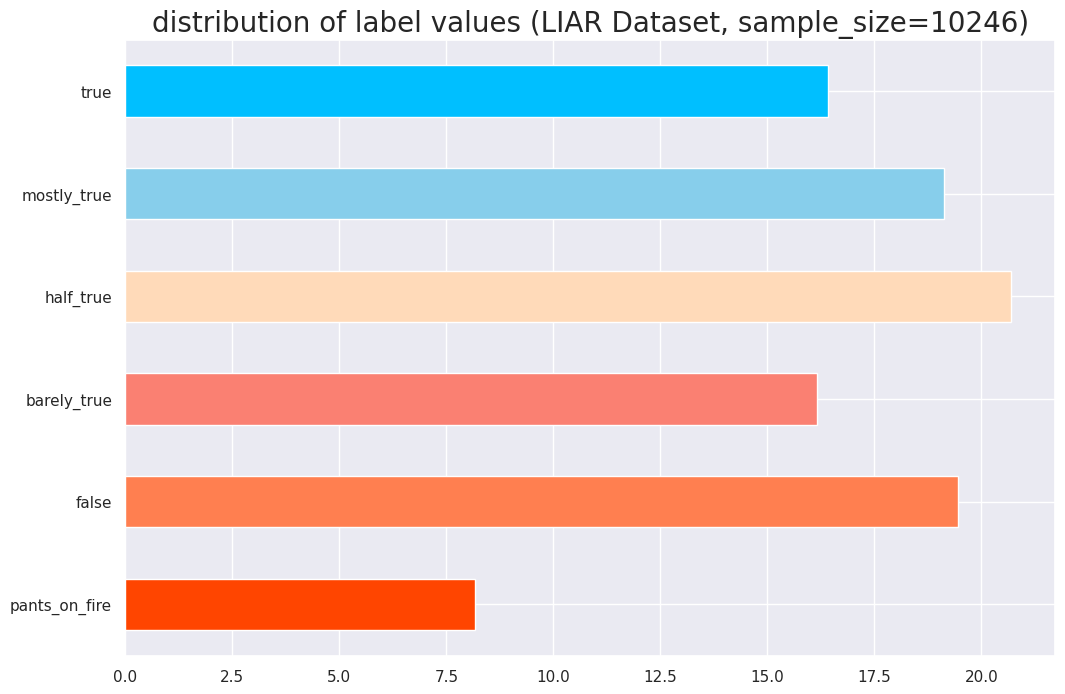

In [ ]:
import seaborn as sns
sns.set()


def label_bar_chart(input_df: pd.DataFrame, title: str = "LIAR Dataset") -> None:

    # computes frequencies of labels and converts to percentages
    label_frequencies = input_df['label'].value_counts(normalize=True)

    def multiply_100(x):
        return x * 100

    label_frequencies = label_frequencies.apply(multiply_100)

    # bar chart ordering and  colors for readability.
    labels = ['pants_on_fire', 'false', 'barely_true', 'half_true', 'mostly_true', 'true']
    colors = [
        'orangered', # pants_on_fire
        'coral', # false
        'salmon', # barely_true
        'peachpuff', # half_true
        'skyblue', # mostly_true
        'deepskyblue' # true
    ]

    label_frequencies = label_frequencies.reindex(index = labels)


    # creates a horizontal bar chart with a descriptive title
    axis = label_frequencies.plot(kind='barh', figsize=(12, 8), color=colors)
    axis.set_title(f"distribution of label values ({title}, sample_size={len(input_df)})", size=20);


# create bar chart over labels for the entire LIAR dataset.
label_bar_chart(df)

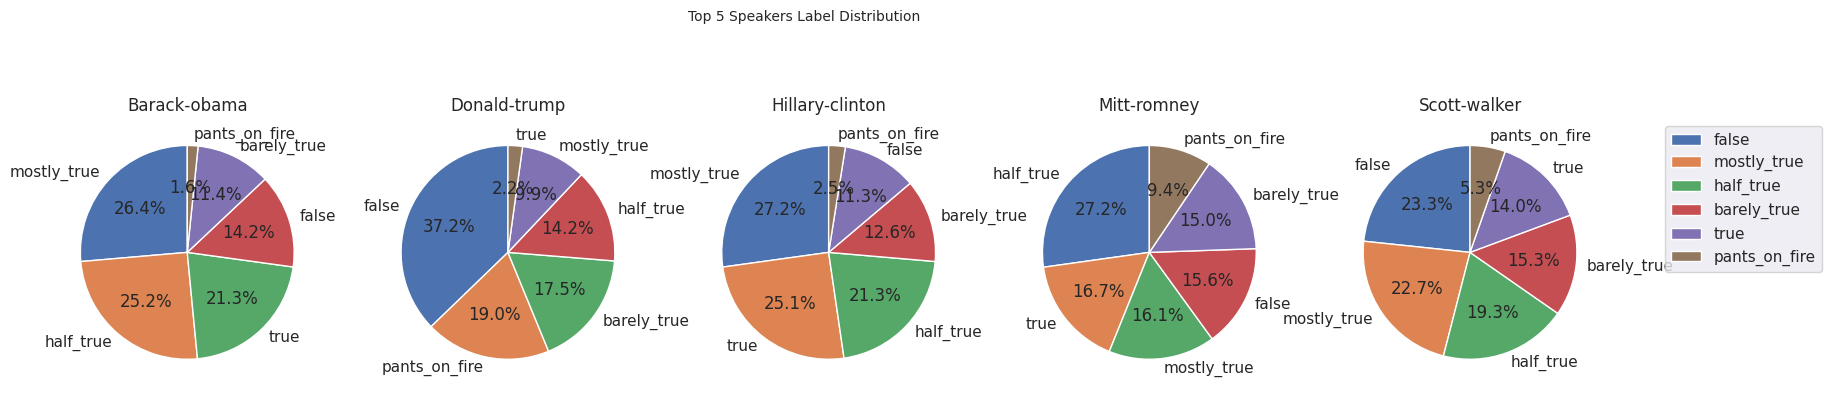

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data = df
# Get the top 5 speakers by count
speakers = data['speaker'].value_counts().head(5).index.tolist()

# Create a pie chart for each speaker
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

for i, speaker in enumerate(speakers):
    # Get the label counts for the speaker
    label_counts = data[data['speaker'] == speaker]['label'].value_counts()

    # Create a pie chart for the label counts
    axes[i].pie(label_counts, labels=label_counts.index.tolist(), autopct='%1.1f%%', startangle=90)
    axes[i].set_title(speaker)
# Add a legend to the pie chart
axes[i].legend(loc='best', bbox_to_anchor=(1.2, 1))

# Add a title to the figure
fig.suptitle('Top 5 Speakers Label Distribution', fontsize=10)

# Display the figure
plt.show()

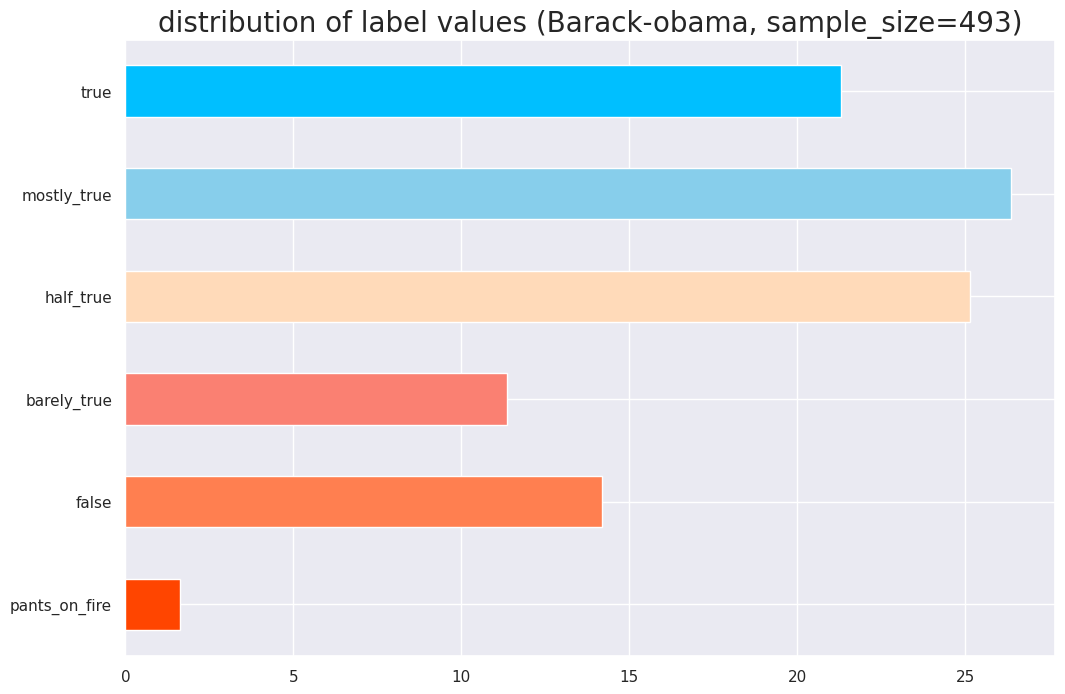

In [ ]:
def speaker_bar_chart(input_df: pd.DataFrame, speaker: str) -> pd.DataFrame:

    # filters the input_df
    speaker_df = input_df[ input_df['speaker'] == speaker ]
    speaker_df.reset_index(inplace=True)

    # calls the bar chart function we created earlier
    label_bar_chart(speaker_df, title=speaker)

    return speaker_df


# create a bar chart over labels for a single speaker. Store the returned dataframe to a variable.
ret_df = speaker_bar_chart(df, 'Barack-obama')

In [ ]:
# this creates a new dataframe that only contains the label and subjects columns.
subject_df = df[['label', 'subject']].copy()

# # start by turning the comma-separated values into a list of values
def csv_to_list(x):
    return x.split(",")

subject_df['subject'] = subject_df['subject'].apply(csv_to_list)

subject_df = subject_df.explode('subject')
subject_df = subject_df.sort_values(by='subject')

subject_df

,label,subject
2702,barely_true,10-news-tampa-bay
2392,barely_true,10-news-tampa-bay
9235,pants_on_fire,10-news-tampa-bay
4197,half_true,10-news-tampa-bay
2464,false,10-news-tampa-bay
...,...,...
7847,barely_true,workers
592,true,workers
3612,false,workers
5792,mostly_true,workers


In [ ]:
num_unique_subjects = subject_df['subject'].nunique()

print(f"Unique subjects in dataset: {num_unique_subjects}")

Unique subjects in dataset: 270


In [ ]:
list(subject_df['subject'].unique())

['10-news-tampa-bay',
 'Abc-news-week',
 'Abortion',
 'Afghanistan',
 'After-the-fact',
 'Agriculture',
 'Alcohol',
 'Animals',
 'Autism',
 'Bankruptcy',
 'Baseball',
 'Bipartisanship',
 'Bush-administration',
 'Campaign-advertising',
 'Campaign-finance',
 'Candidates-biography',
 'Cap-and-trade',
 'Census',
 'Children',
 'China',
 'City-budget',
 'City-government',
 'Civil-rights',
 'Climate-change',
 'Congress',
 'Congressional-rules',
 'Consumer-safety',
 'Corporations',
 'Corrections-and-updates',
 'County-budget',
 'County-government',
 'Crime',
 'Criminal-justice',
 'Death-penalty',
 'Debates',
 'Debt',
 'Deficit',
 'Disability',
 'Diversity',
 'Drugs',
 'Ebola',
 'Economy',
 'Education',
 'Elections',
 'Energy',
 'Environment',
 'Ethics',
 'Fake-news',
 'Families',
 'Federal-budget',
 'Financial-regulation',
 'Fires',
 'Florida',
 'Florida-amendments',
 'Food',
 'Food-safety',
 'Foreign-policy',
 'Gambling',
 'Gas-prices',
 'Gays-and-lesbians',
 'Government-efficiency',
 'Govern

In [ ]:
import numpy as np
import plotly.express as px
fig = px.treemap(df, path=["party_affiliation", 'label'],
                  color='label', hover_data=['label'],
                  color_continuous_midpoint=df['label'],
                  color_continuous_scale='RdBu')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
#fig.title('Distribution of statement labels across Political affiliation')
fig.show()

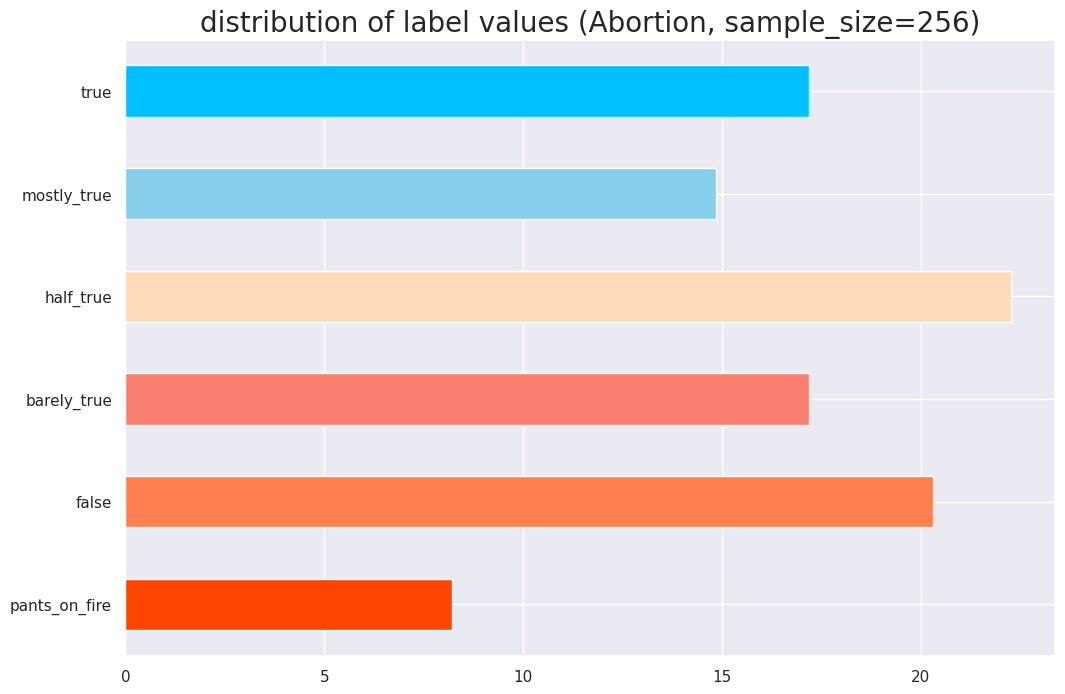

In [ ]:
def subject_bar_chart(input_df: pd.DataFrame, subject: str) -> pd.DataFrame:

    # filters the input_df
    ret_df = input_df[ input_df['subject'] == subject ]
    ret_df.reset_index(inplace=True)

    # calls the bar chart function we created earlier
    label_bar_chart(ret_df, title=subject)

    return ret_df


# create a bar chart over labels for a single subject. Store the returned dataframe to a variable.
ret_df = subject_bar_chart(subject_df, 'Abortion')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = df

def group_bar_chart(data, subjects, title):
    # Initialize a list of colors for the bar chart
    colors = ['blue', 'green', 'orange', 'red', 'purple']

    # Create a figure with a subplot for each subject
    fig, axes = plt.subplots(nrows=1, ncols=len(subjects), figsize=(20, 5))

    # Create a bar chart for each subject
    for i, subject in enumerate(subjects):
        # Get the label counts for the subject
        label_counts = data[data['context'] == subject]['label'].value_counts()

        # Create a bar chart for the label counts
        label_counts.plot(kind='bar', ax=axes[i], color=colors[i])
        axes[i].set_title(subject)

    # Add a title to the figure
    fig.suptitle(title, fontsize=16)

    # Add a legend to the figure
    fig.legend(labels=['pants-fire', 'false', 'barely-true', 'half-true', 'mostly-true', 'true'], bbox_to_anchor=(1.1, 1))

    # Display the figure
    plt.show()


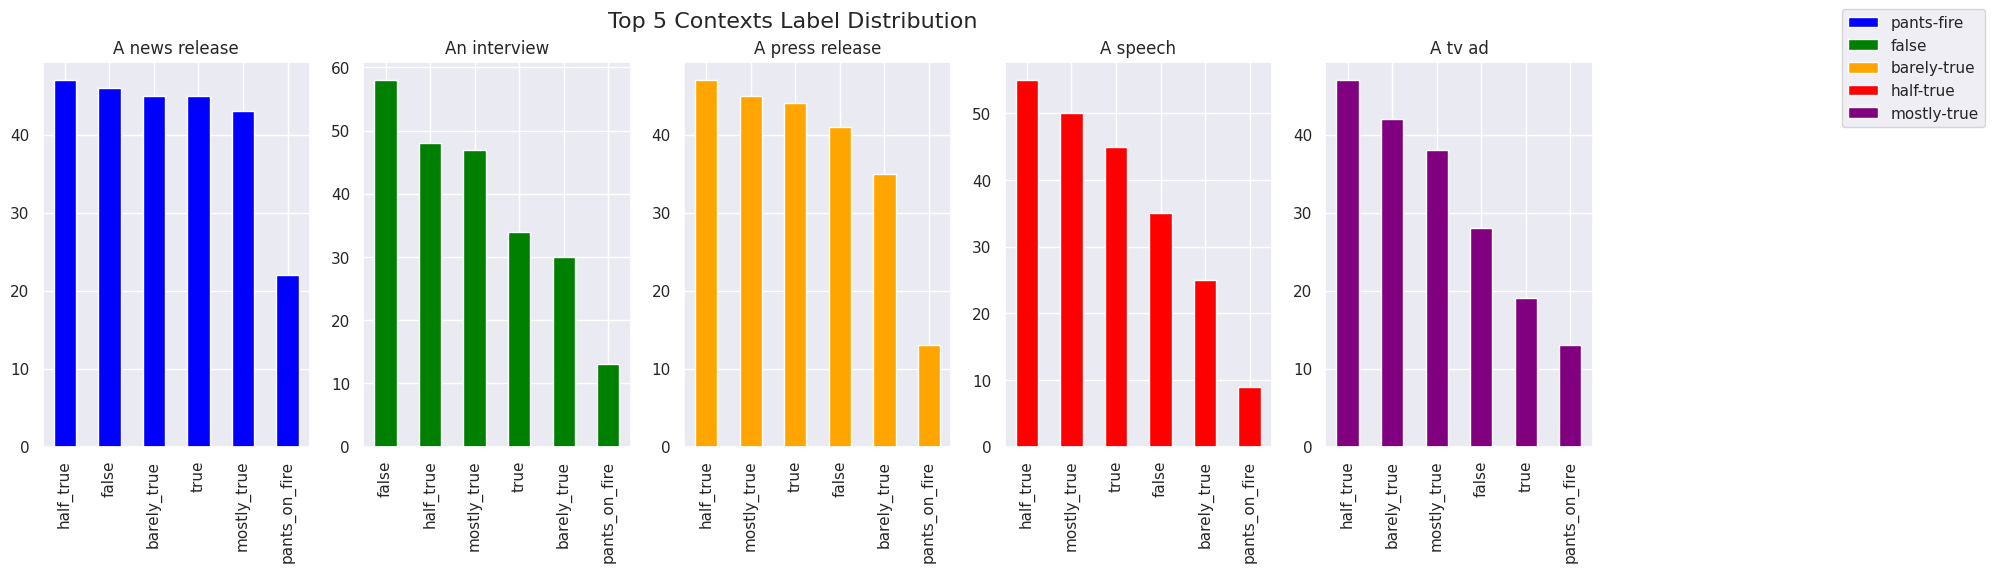

In [ ]:
# Get the top 5 Contexts by label distribution
top_Contexts = data.groupby('context')['label'].count().sort_values(ascending=False).head(5).index.tolist()

# Create a group bar chart for the top 5 Contexts
group_bar_chart(data, top_Contexts, 'Top 5 Contexts Label Distribution')

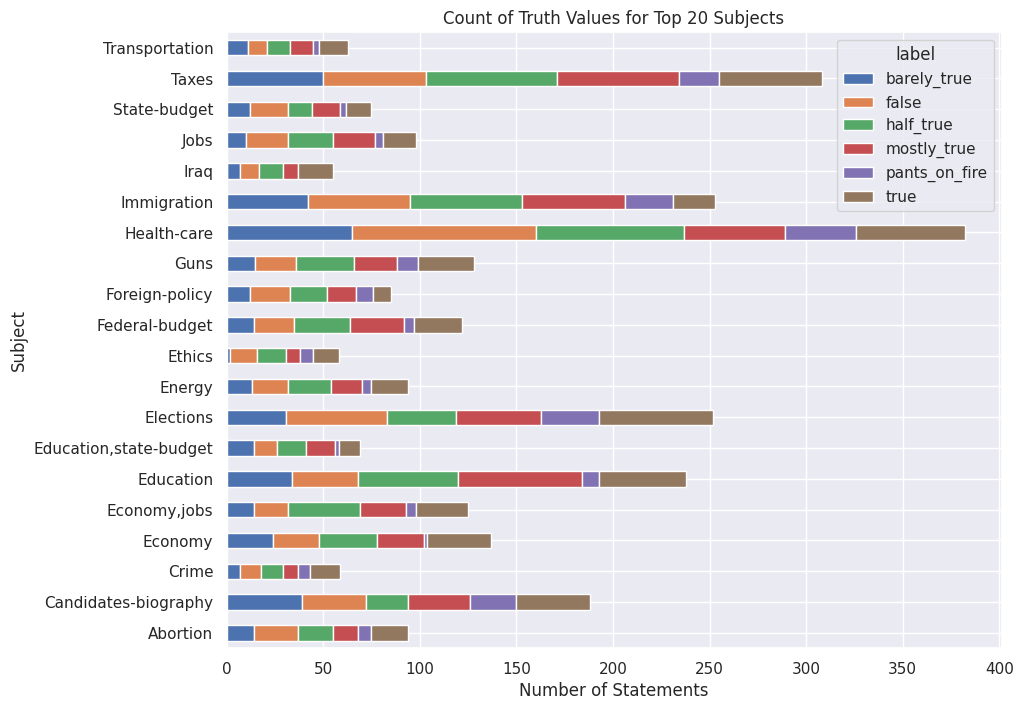

In [ ]:
# Get the 20 most common subjects
top_subjects = df['subject'].value_counts().nlargest(20).index.tolist()

# Filter the dataset to only include the top 20 subjects
df_top_subjects = df[df['subject'].isin(top_subjects)]

# Group by subject and truth value, and count the number of statements in each group
grouped = df_top_subjects.groupby(['subject', 'label']).size().reset_index(name='Count')

# Pivot the table to make truth values the columns
pivoted = grouped.pivot(index='subject', columns='label', values='Count')


# Create the horizontal grouped bar chart
pivoted.plot(kind='barh', stacked=True, figsize=(10, 8))
plt.title('Count of Truth Values for Top 20 Subjects')
plt.xlabel('Number of Statements')
plt.ylabel('Subject')
plt.show()

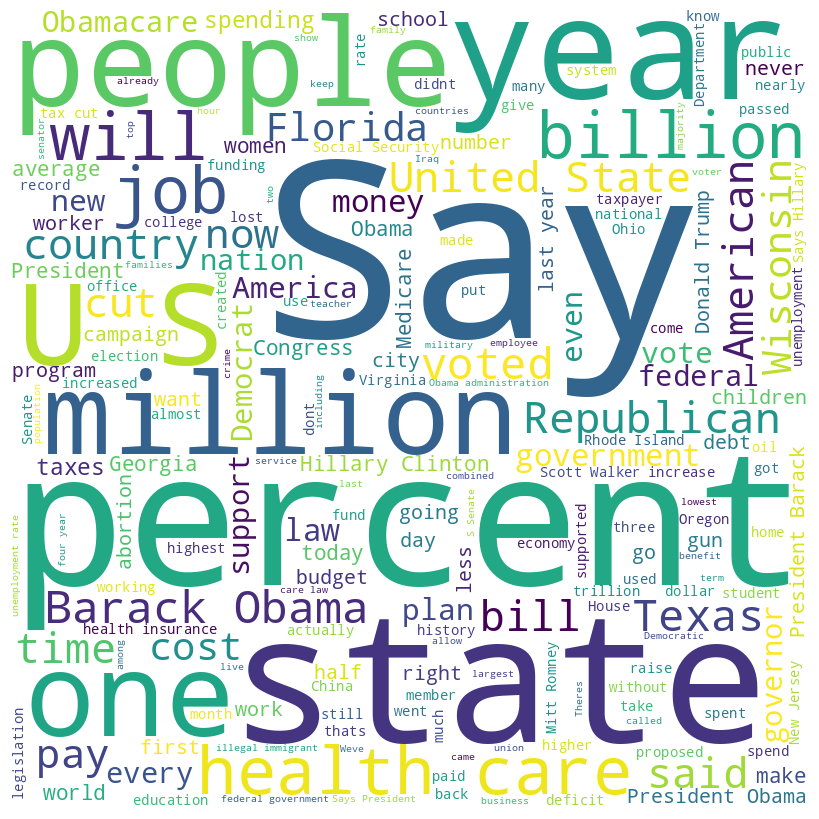

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
data = df
# Concatenate all the statements into a single string
all_statements = ' '.join(data['statement'].tolist())

# Create a word cloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_statements)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


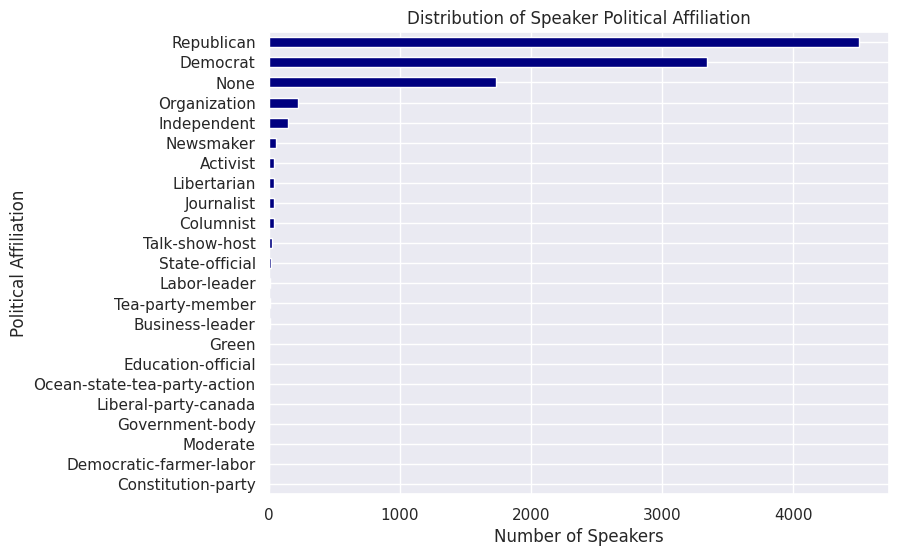

In [ ]:
# Count the number of speakers for each party affiliation
affiliation_counts = df['party_affiliation'].value_counts()

# Sort the values in descending order
affiliation_counts = affiliation_counts.sort_values(ascending=True)

# Create a horizontal bar chart
affiliation_counts.plot(kind='barh', figsize=(8,6), color='navy')

# Add labels and title
plt.xlabel('Number of Speakers')
plt.ylabel('Political Affiliation')
plt.title('Distribution of Speaker Political Affiliation')

# Show the plot
plt.show()

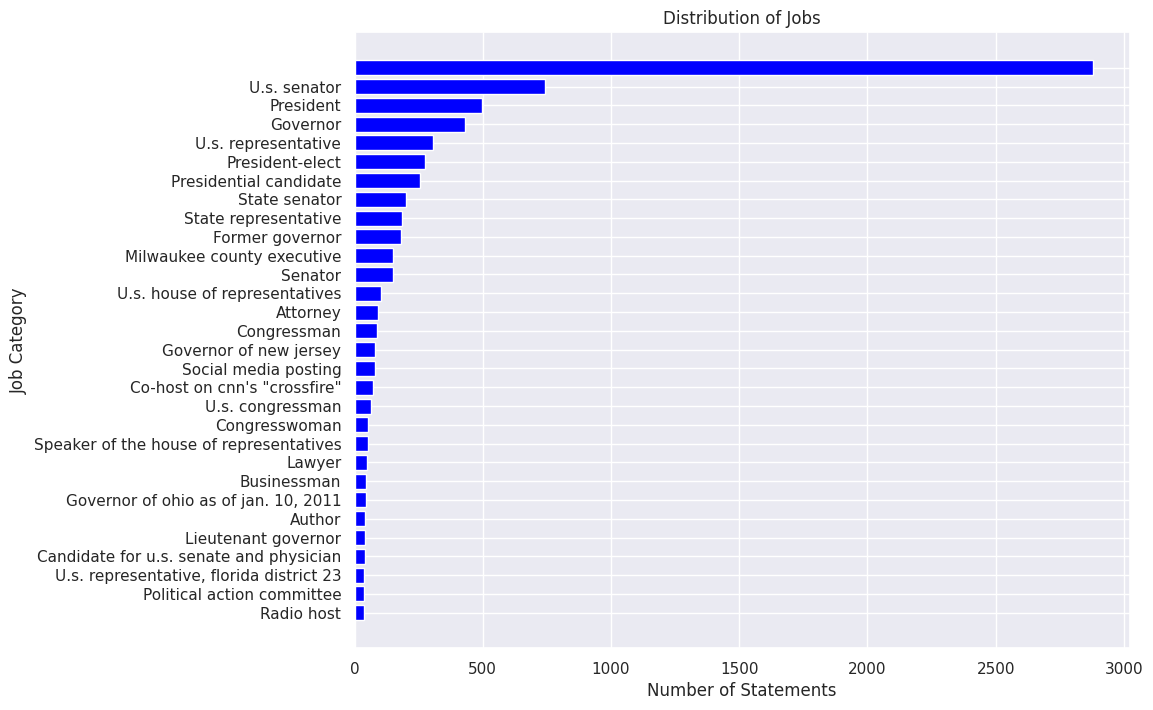

In [ ]:
# Get the count of statements for each job category
job_counts = df['job_title'].value_counts().nlargest(30)

# Create a horizontal bar chart
plt.figure(figsize=(10,8))
plt.barh(job_counts.index, job_counts.values, color='blue')
plt.gca().invert_yaxis() # Invert the y-axis to show the categories in descending order
plt.title('Distribution of Jobs')
plt.xlabel('Number of Statements')
plt.ylabel('Job Category')
plt.show()

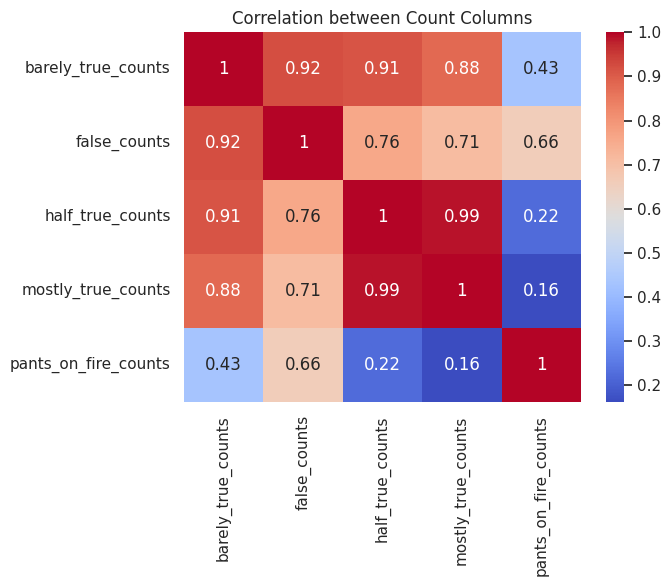

In [ ]:
# select the count columns
count_cols = ['barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts']

# compute the correlation matrix
corr_matrix = df[count_cols].corr()

# plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Count Columns')
plt.show()

In [ ]:
grouped_state_label = df.groupby(['state_info', 'label']).size().reset_index(name='counts')
grouped_state_label

,state_info,label,counts
0,,barely_true,354
1,,false,442
2,,half_true,437
3,,mostly_true,334
4,,pants_on_fire,310
...,...,...,...
275,Wisconsin,pants_on_fire,57
276,Wisconsin,true,85
277,Wyoming,barely_true,1
278,Wyoming,true,3


In [ ]:
grouped_state_label = grouped_state_label[grouped_state_label['state_info'] != 'the United States']

In [ ]:
data_c=set(grouped_state_label['state_info'].unique())

In [ ]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}


In [ ]:
difference=list(data_c.difference(us_state_abbrev))

In [ ]:
grouped_state_label = grouped_state_label[grouped_state_label['state_info'].isin(difference)==False]

In [ ]:
grouped_state_label['state_info']=grouped_state_label['state_info'].map(us_state_abbrev)

<ipython-input-46-93136d97310a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
grouped_state_label

,state_info,label,counts
6,AL,barely_true,4
7,AL,false,3
8,AL,half_true,4
9,AL,mostly_true,2
10,AL,pants_on_fire,1
...,...,...,...
274,WI,mostly_true,133
275,WI,pants_on_fire,57
276,WI,true,85
277,WY,barely_true,1


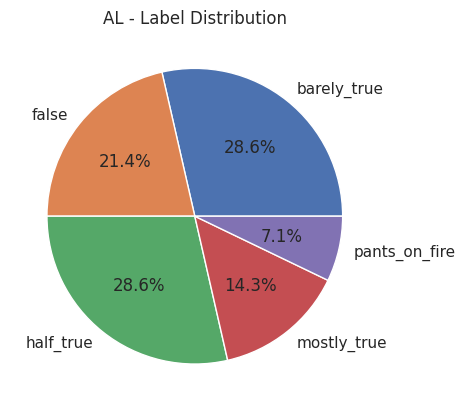

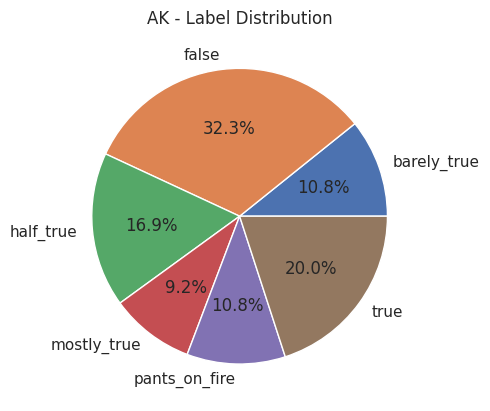

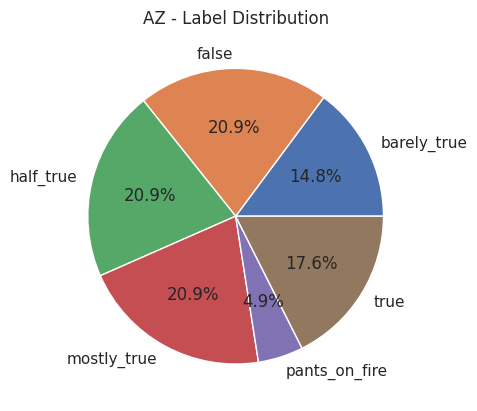

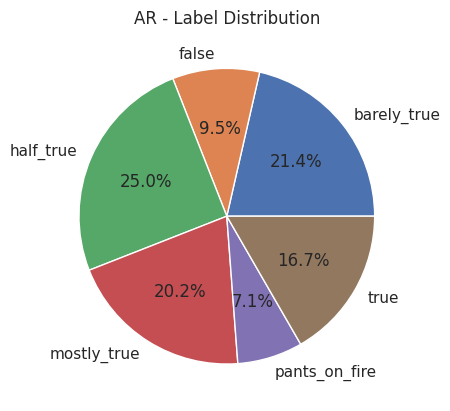

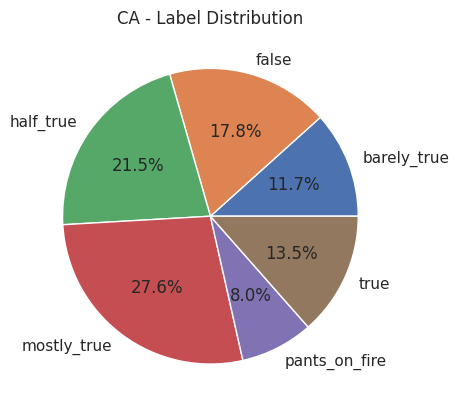

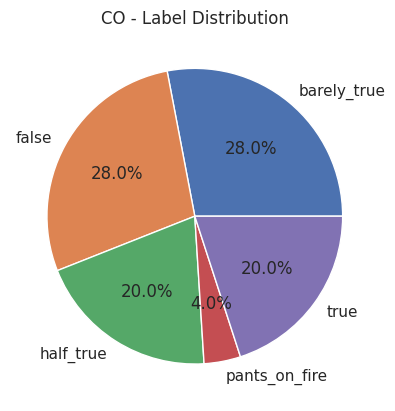

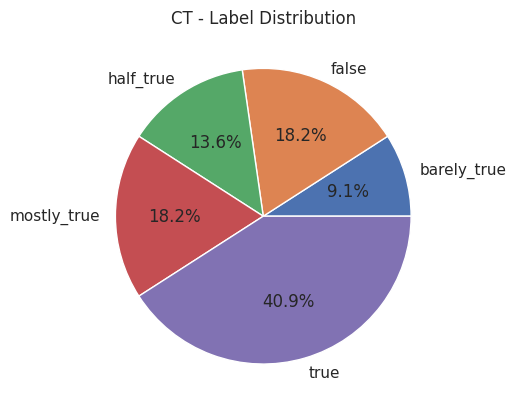

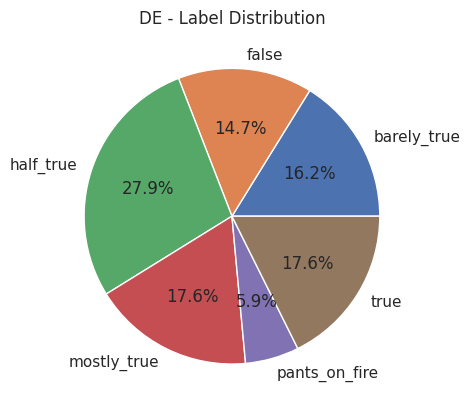

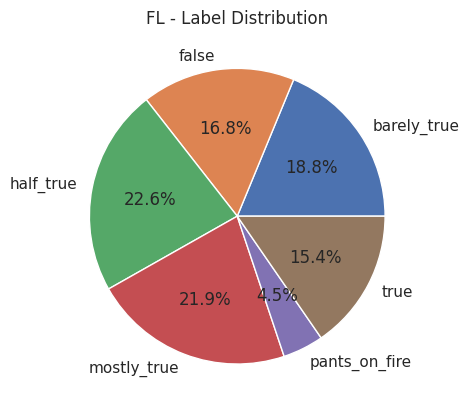

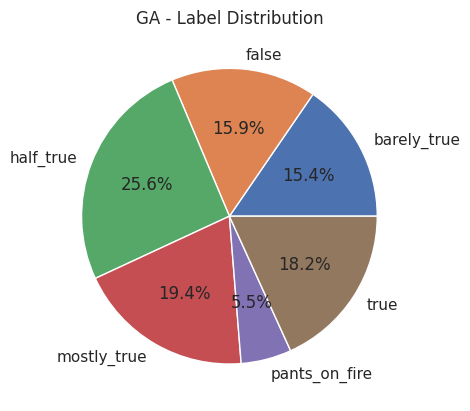

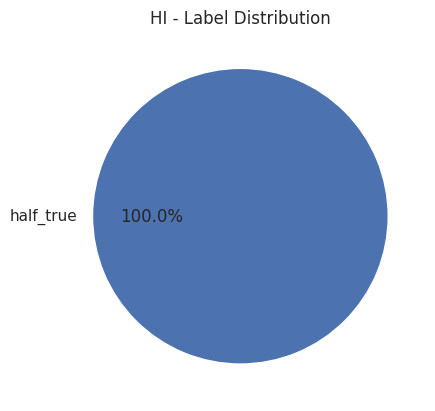

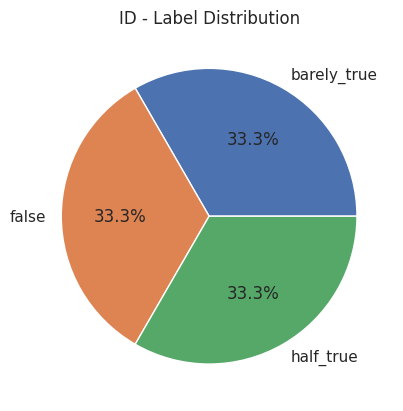

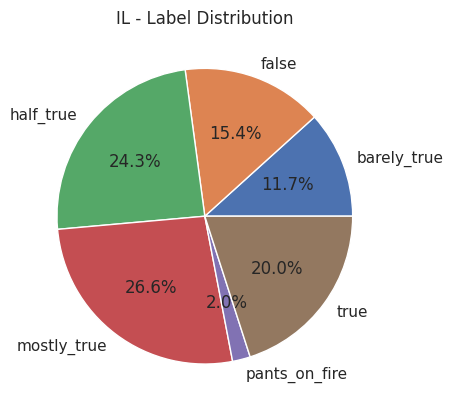

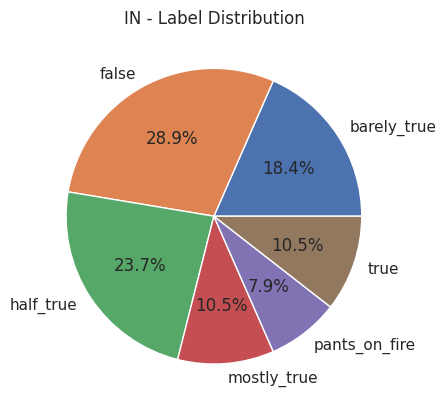

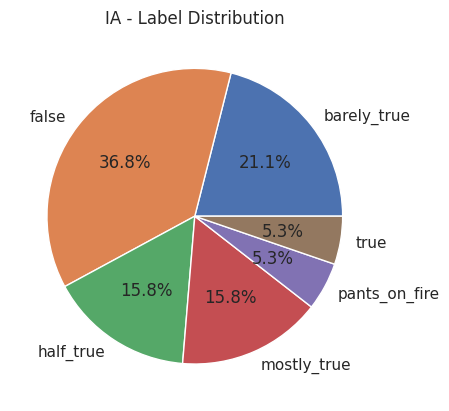

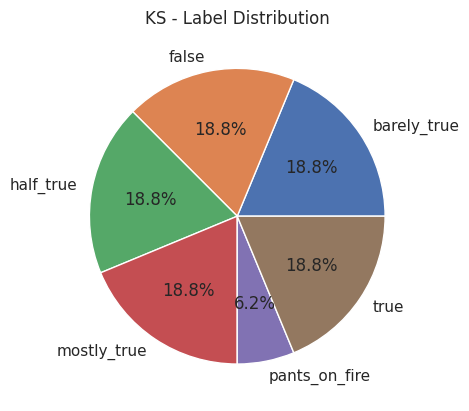

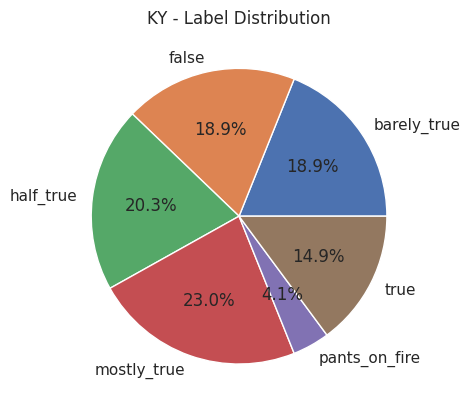

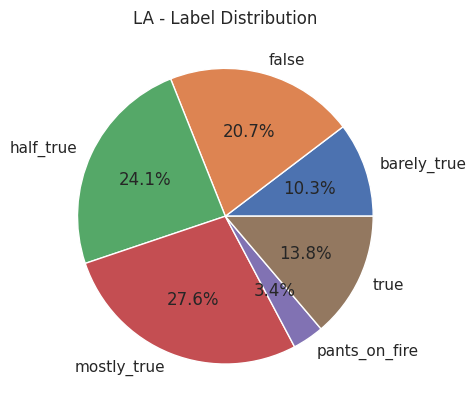

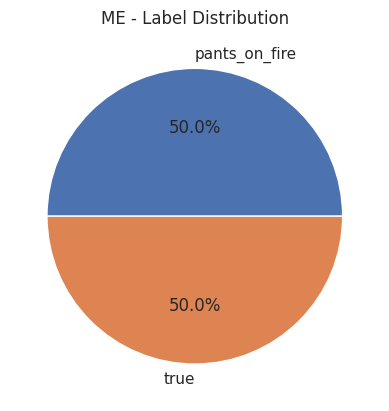

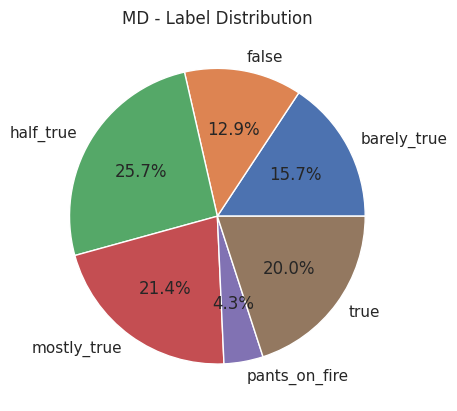

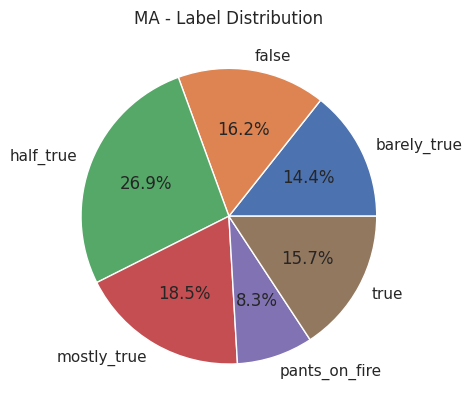

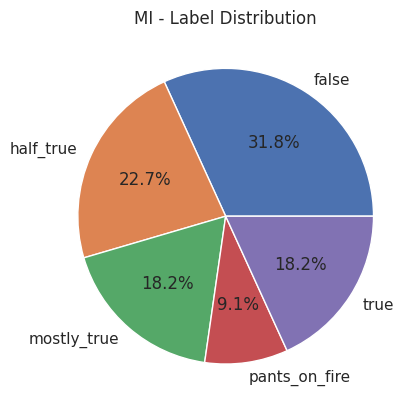

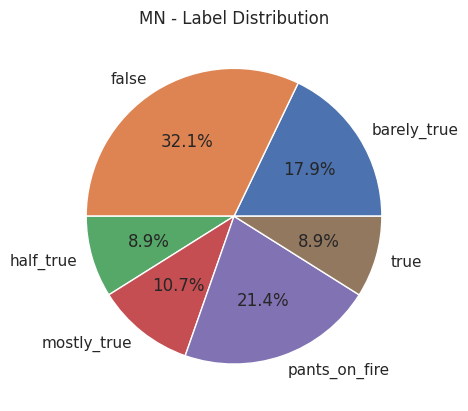

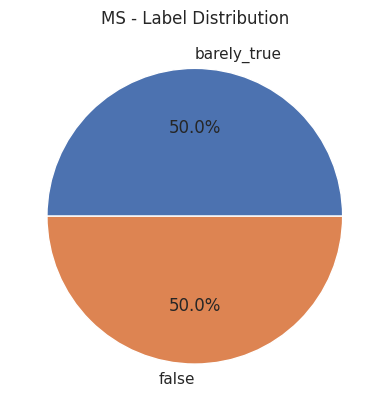

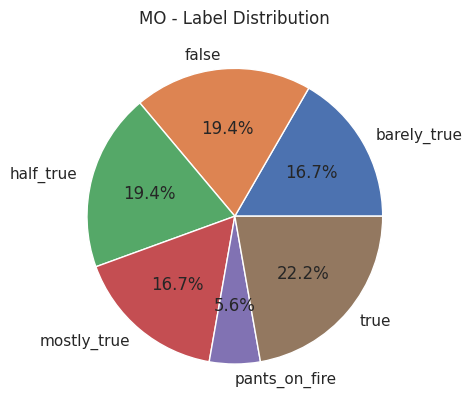

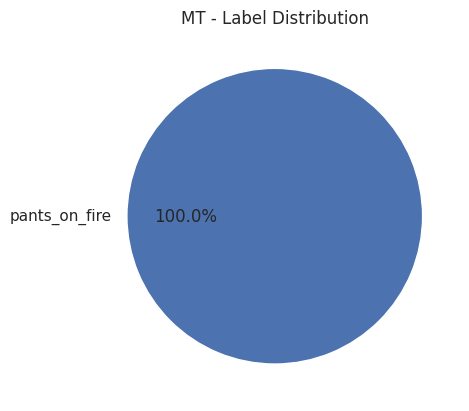

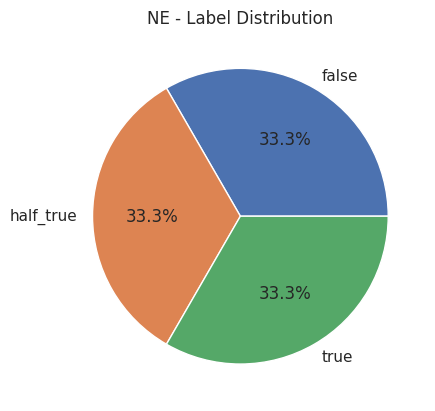

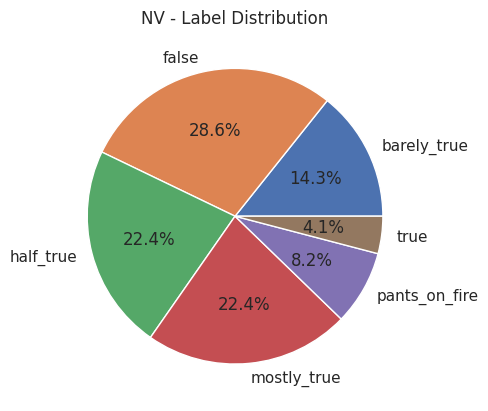

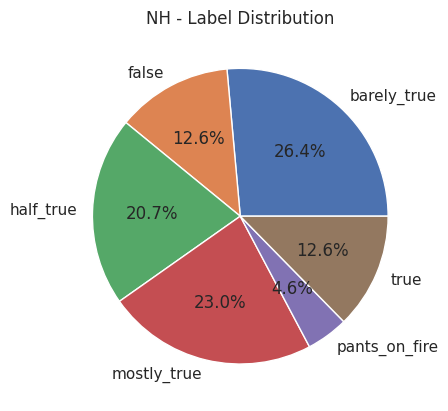

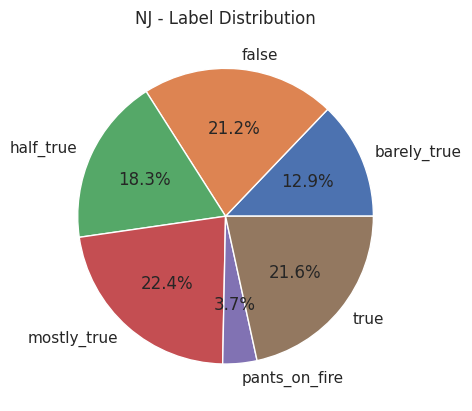

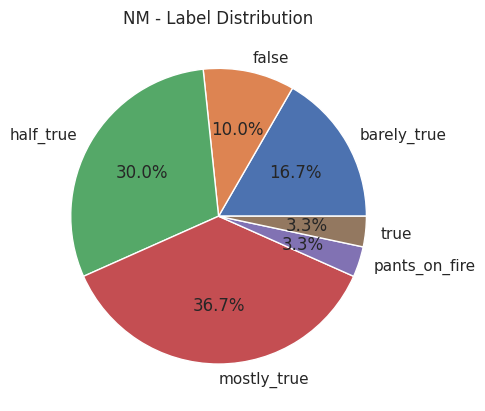

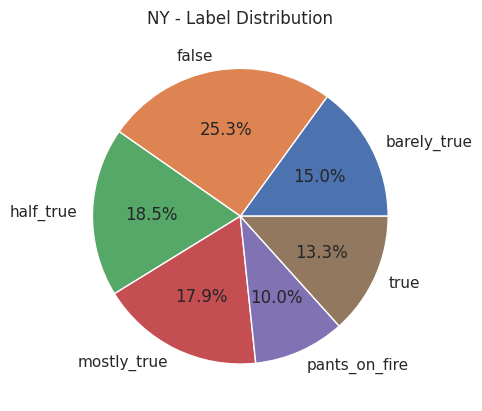

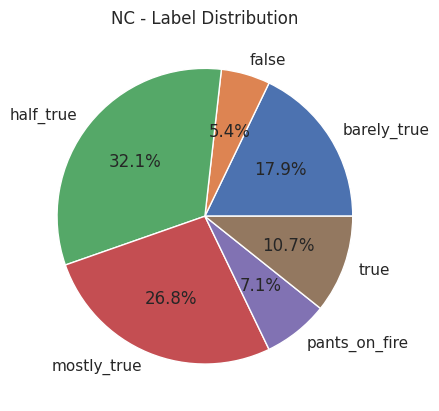

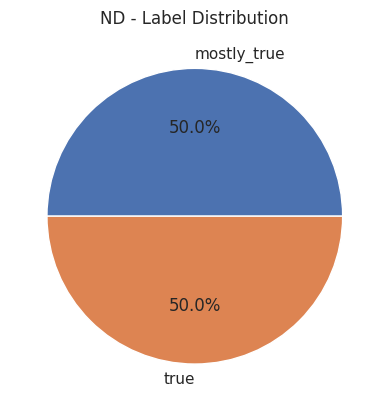

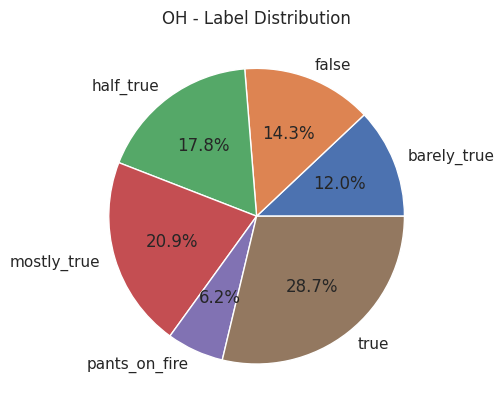

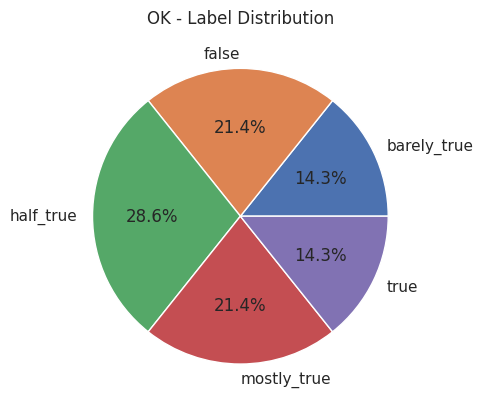

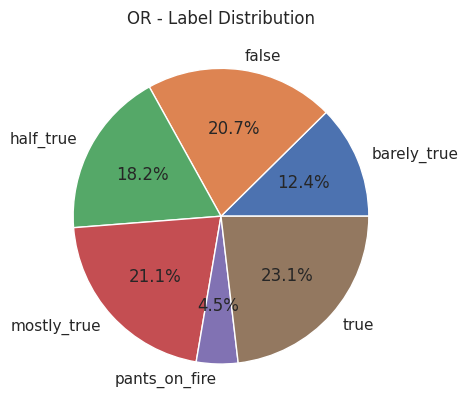

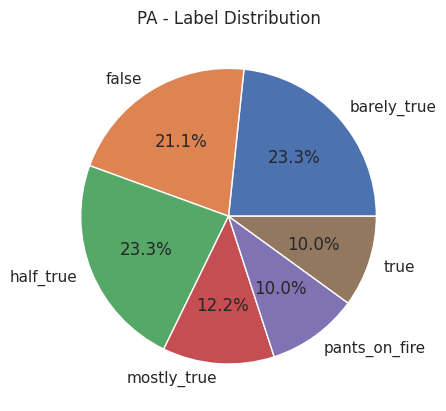

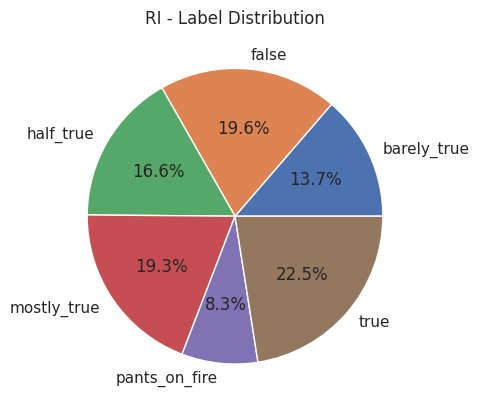

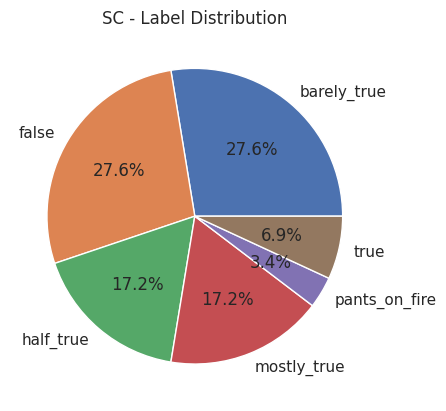

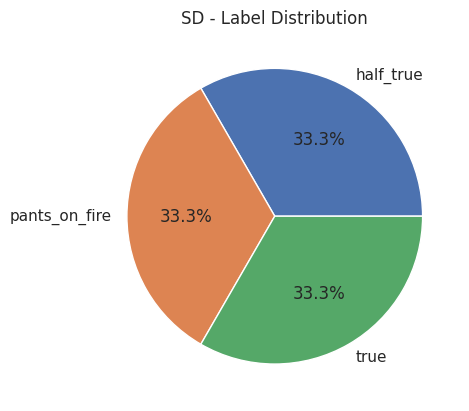

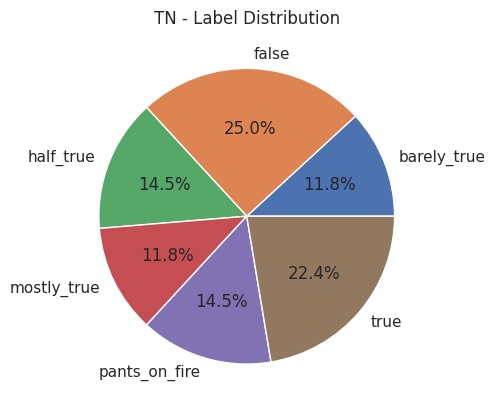

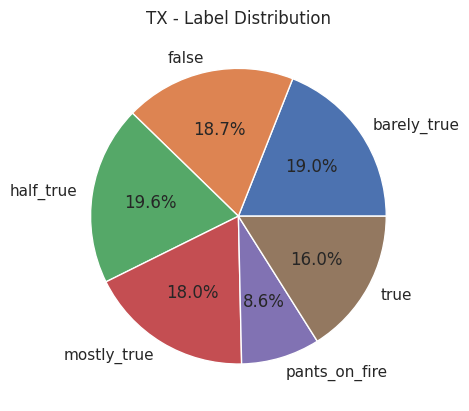

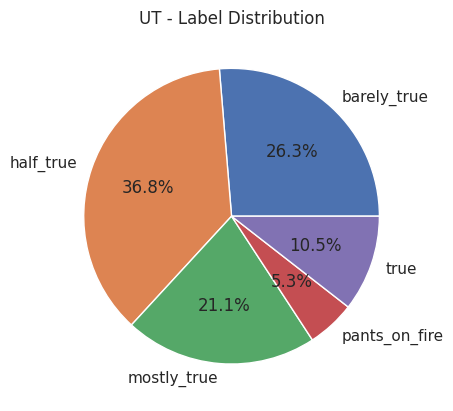

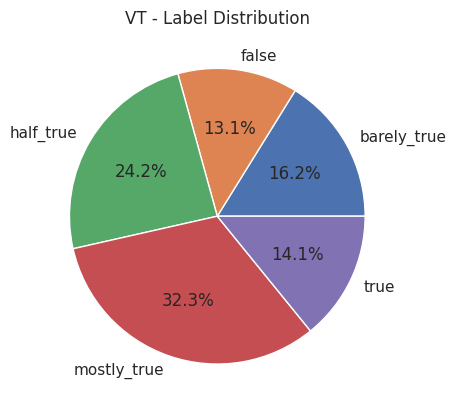

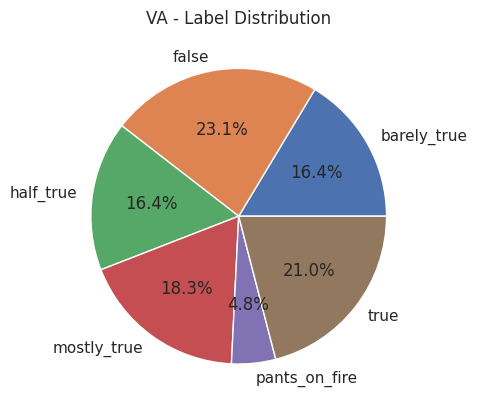

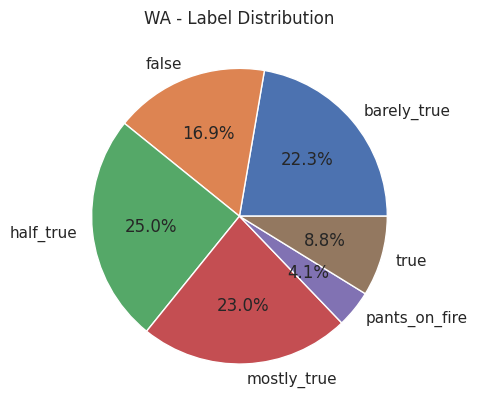

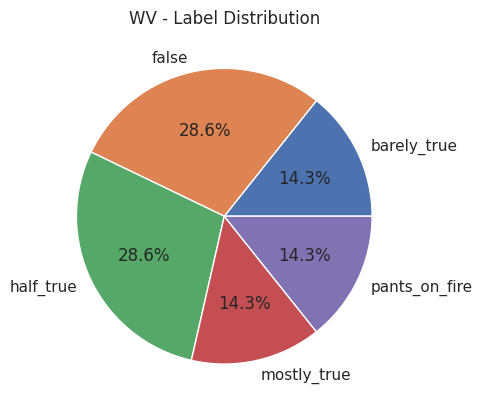

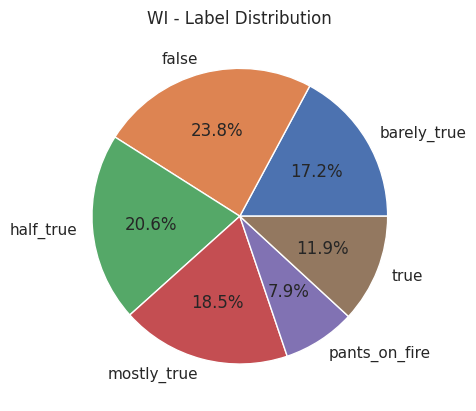

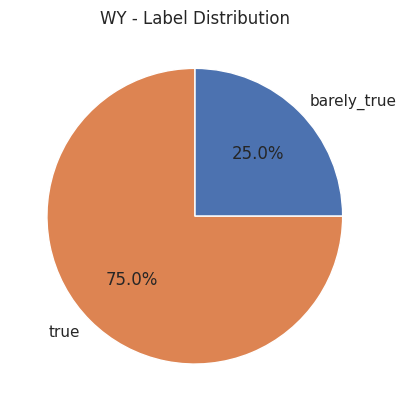

In [ ]:
# Get the unique list of states
states = grouped_state_label['state_info'].unique()

# Loop through each state and create a pie chart showing the distribution of labels
for state in states:
    state_data = grouped_state_label[grouped_state_label['state_info'] == state]
    labels = state_data['label'].tolist()
    counts = state_data['counts'].tolist()

    # Create the pie chart
    fig, ax = plt.subplots()
    ax.pie(counts, labels=labels, autopct='%1.1f%%')
    ax.set_title(f"{state} - Label Distribution")
    plt.show()

In [ ]:
# group by state and label, and sum the counts
grouped = grouped_state_label.groupby(['state_info', 'label'])['counts'].sum()

# unstack the label index to make them columns
df_new = grouped.unstack(level='label').reset_index()

# fill missing values with 0
df_new = df_new.fillna(0)

# rename the columns
df_new.columns = ['state', 'barely_true', 'false', 'half_true', 'mostly_true', 'pants_on_fire', 'true']

# sort by state
df_new = df_new.sort_values('state').reset_index(drop=True)

In [ ]:
df_new

,state,barely_true,false,half_true,mostly_true,pants_on_fire,true
0,AK,7.0,21.0,11.0,6.0,7.0,13.0
1,AL,4.0,3.0,4.0,2.0,1.0,0.0
2,AR,18.0,8.0,21.0,17.0,6.0,14.0
3,AZ,27.0,38.0,38.0,38.0,9.0,32.0
4,CA,19.0,29.0,35.0,45.0,13.0,22.0
5,CO,7.0,7.0,5.0,0.0,1.0,5.0
6,CT,2.0,4.0,3.0,4.0,0.0,9.0
7,DE,11.0,10.0,19.0,12.0,4.0,12.0
8,FL,189.0,169.0,228.0,221.0,45.0,155.0
9,GA,67.0,69.0,111.0,84.0,24.0,79.0


#Binary Classification using tfidf Vectorizer

In [ ]:
import pickle
import warnings

import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, f1_score, precision_score,
                             recall_score)
from sklearn.model_selection import (GridSearchCV, KFold, RandomizedSearchCV,
                                     learning_curve)
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Importing the datasets
train_data = df[['label', 'statement']].copy()
valid_data = dftest[['label', 'statement']].copy()
test_data = dfvalid[['label', 'statement']].copy()

In [ ]:
valid_data['label'] = valid_data['label'].replace([0,1,2,3,4,5], ['false', 'half_true','mostly_true','true','barely_true','pants_on_fire',])
test_data['label'] = test_data['label'].replace([0,1,2,3,4,5], ['false', 'half_true','mostly_true','true','barely_true','pants_on_fire',])

In [ ]:
train_data.sample(5)

,label,statement
1233,false,Attorney General Eric Holder is involved in th...
1325,pants_on_fire,"The working tax cut created over 40,000 new jo..."
3837,mostly_true,"During the last election, Democrats won over a..."
9806,true,Refugees are subject to more rigorous screenin...
8962,mostly_true,There are only about 10 people in the United S...


In [ ]:

# show the unique values in the 'label' column
unique_labels = df['label'].unique()
print(unique_labels)

['false' 'half_true' 'mostly_true' 'true' 'barely_true' 'pants_on_fire']


In [ ]:
def convert_label_to_binary(label):
    if label in ["pants_on_fire", "false", "barely_true"]:
        return "false"
    elif label in ["mostly_true", "true", "half_true"]:
        return "true"
    else:
        raise ValueError(f"Invalid label: {label}")

In [ ]:
# convert the labels to "true" or "false"
train_data["binary_label"] = [convert_label_to_binary(label) for label in train_data["label"]]
valid_data["binary_label"] = [convert_label_to_binary(label) for label in valid_data["label"]]
test_data["binary_label"] = [convert_label_to_binary(label) for label in test_data["label"]]

In [ ]:
train_data = train_data.drop('label', axis=1)
valid_data = valid_data.drop('label', axis=1)
test_data = test_data.drop('label', axis=1)

In [ ]:
train_data.sample(5)

,statement,binary_label
4783,Says Ohio Gov. John Kasich got lucky with a th...,false
815,#GradInsurance debacle is a DIRECT result of #...,true
703,Its hard to get people in Portland to vote yes...,false
3410,Of the four statewide races this century withi...,true
6587,Not a single unarmed white person has been sho...,false


In [ ]:
print('Train dataset size: {}'.format(train_data.shape))
print('Valid dataset size: {}'.format(valid_data.shape))
print('Test dataset size: {}'.format(test_data.shape))

Train dataset size: (10246, 2)
Valid dataset size: (1283, 2)
Test dataset size: (1284, 2)


In [ ]:
#Combining train_data and valid_data into a single training set
training_set = pd.concat([train_data, valid_data], ignore_index=True)
print('Training set size: {}'.format(training_set.shape))
training_set.sample(5)

Training set size: (11529, 2)


,statement,binary_label
1665,Gov. Rick Perry broke his promise that he woul...,true
311,Blames Mike McIntyre and Nancy Pelosi for the ...,false
8115,"""Close to half of the folks in this country il...",true
11343,The $18.8 billion in funding for K-12 educatio...,true
9540,The post-Soviet industrial meltdown is respons...,true


In [ ]:
X_train = training_set['statement'].values
X_test = test_data['statement'].values
y_train = training_set['binary_label'].values
y_test = test_data['binary_label'].values

In [ ]:

#download the stopwords corpus (you only need to do this once)
#nltk.download('stopwords')

#create a stopwords list for English
stopwords_list = list(stopwords.words('english'))

#print the list of stopwords
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
#Creating a TfidfVectorizer object and analyzing the training set
tfidf_V = TfidfVectorizer(stop_words=stopwords_list, use_idf=True, smooth_idf=True)
train_count = tfidf_V.fit_transform(train_data['statement'].values)

In [ ]:
# create a TF-IDF vectorizer object
tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords_list, use_idf=True, smooth_idf=True)

# fit the vectorizer on the training data
tfidf_vectorizer.fit(X_train)

# transform the training and testing data using the vectorizer
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
X_train

array(['Says the Annies List political group supports third-trimester abortions on demand.',
       'When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.',
       'Hillary Clinton agrees with John McCain "by voting to give George Bush the benefit of the doubt on Iran."',
       ...,
       'In the early 1980s, Sen. Edward Kennedy secretly offered to help Soviet leaders counter the Reagan administrations position on nuclear disarmament.',
       'Says an EPA permit languished under Strickland but his new EPA director got it done in two days.',
       'Says the governor is going around the state talking about [how] we should fund an income tax cut that benefits higher income earners and not lower income earners'],
      dtype=object)

In [ ]:
y_train

array(['false', 'true', 'true', ..., 'false', 'false', 'false'],
      dtype=object)

Logistic Regression

In [ ]:
# create a logistic regression model
logreg = LogisticRegression()

# fit the model on the transformed training data
logreg.fit(X_train_tfidf, y_train)

# evaluate the model on the transformed train data
logreg_pred = logreg.predict(X_train_tfidf)


accuracy = accuracy_score(y_train, logreg_pred)
precision = precision_score(y_train, logreg_pred, pos_label='false')
recall = recall_score(y_train, logreg_pred, pos_label='false')
f1 = f1_score(y_train, logreg_pred, pos_label='false')

print('Logistic Regression Training Data Stats:')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


Logistic Regression Training Data Stats:
Accuracy: 0.7847168011102438
Precision: 0.8199549887471868
Recall: 0.6504661773457647
F1 score: 0.7254424778761063


In [ ]:
# evaluate the model on the transformed testing data
logreg_pred = logreg.predict(X_test_tfidf)


accuracy = accuracy_score(y_test, logreg_pred)
precision = precision_score(y_test, logreg_pred, pos_label='false')
recall = recall_score(y_test, logreg_pred, pos_label='false')
f1 = f1_score(y_test, logreg_pred, pos_label='false')

print('Logistic Regression Test Data Stats:')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


Logistic Regression Test Data Stats:
Accuracy: 0.6035825545171339
Precision: 0.6098562628336756
Recall: 0.48214285714285715
F1 score: 0.5385312783318223


Naive Bayes model

In [ ]:
# create a naive Bayes model
nb = MultinomialNB()

# fit the model on the transformed training data
nb.fit(X_train_tfidf, y_train)

# evaluate the model on the transformed train data
nb_pred = nb.predict(X_train_tfidf)

accuracy = accuracy_score(y_train, nb_pred)
precision = precision_score(y_train, nb_pred, pos_label='false')
recall = recall_score(y_train, nb_pred, pos_label='false')
f1 = f1_score(y_train, nb_pred, pos_label='false')

print('\nNaive Bayes Train Data Stats:')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


Naive Bayes Train Data Stats:
Accuracy: 0.7699713765287536
Precision: 0.9020531807472232
Recall: 0.5316405475104146
F1 score: 0.6689965052421368


In [ ]:
# evaluate the model on the transformed testing data
nb_pred = nb.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, nb_pred)
precision = precision_score(y_test, nb_pred, pos_label='false')
recall = recall_score(y_test, nb_pred, pos_label='false')
f1 = f1_score(y_test, nb_pred, pos_label='false')

print('\nNaive Bayes Test data stats:')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


Naive Bayes Test data stats:
Accuracy: 0.5965732087227414
Precision: 0.657051282051282
Recall: 0.3327922077922078
F1 score: 0.44181034482758624


SVM model

In [ ]:
# create a SVM model
svm = SVC(probability=True)

# fit the model on the transformed training data
svm.fit(X_train_tfidf, y_train)

# evaluate the model on the transformed train data
svm_pred = svm.predict(X_train_tfidf)

accuracy = accuracy_score(y_train, svm_pred)
precision = precision_score(y_train, svm_pred, pos_label='false')
recall = recall_score(y_train, svm_pred, pos_label='false')
f1 = f1_score(y_train, svm_pred, pos_label='false')

print('\nSVM Train Data Stats:')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


SVM Train Data Stats:
Accuracy: 0.958018908838581
Precision: 0.9867549668874173
Recall: 0.9162864511009721
F1 score: 0.9502160049372559


In [ ]:
# evaluate the model on the transformed testing data
svm_pred = svm.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, svm_pred)
precision = precision_score(y_test, svm_pred, pos_label='false')
recall = recall_score(y_test, svm_pred, pos_label='false')
f1 = f1_score(y_test, svm_pred, pos_label='false')

print('\nSVM Test Data Stats:')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


SVM Test Data Stats:
Accuracy: 0.6253894080996885
Precision: 0.65807962529274
Recall: 0.45616883116883117
F1 score: 0.538830297219559


Random forest model

In [ ]:
# create a random forest model
rf = RandomForestClassifier()

# fit the model on the transformed training data
rf.fit(X_train_tfidf, y_train)

# evaluate the model on the transformed train data
rf_pred = rf.predict(X_train_tfidf)

accuracy = accuracy_score(y_train, rf_pred)
precision = precision_score(y_train, rf_pred, pos_label='false')
recall = recall_score(y_train, rf_pred, pos_label='false')
f1 = f1_score(y_train, rf_pred, pos_label='false')

print('\nRandom Forest Classifier Train Data Stats:')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


Random Forest Classifier Train Data Stats:
Accuracy: 0.9995663110417209
Precision: 0.9990091161315894
Recall: 1.0
F1 score: 0.9995043124814118


In [ ]:
# evaluate the model on the transformed testing data
rf_pred = rf.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, rf_pred)
precision = precision_score(y_test, rf_pred, pos_label='false')
recall = recall_score(y_test, rf_pred, pos_label='false')
f1 = f1_score(y_test, rf_pred, pos_label='false')

print('\nRandom Forest Classifier Test Data Stats:')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


Random Forest Classifier Test Data Stats:
Accuracy: 0.6144859813084113
Precision: 0.6359550561797753
Recall: 0.4594155844155844
F1 score: 0.5334590009425071


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# define the hyperparameter grid
param_grid = {
    'max_depth': [100, 105, 110, 115, 120],  # maximum depth of each tree
    'min_samples_split': [4, 5, 6],  # minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2]  # minimum number of samples required to be at a leaf node
}


# create a Random Forest classifier
rf = RandomForestClassifier()

# perform grid search to find the best hyperparameter value
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train_tfidf, y_train)

# evaluate the best model on the testing data
rf_pred = grid_search.best_estimator_.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, rf_pred)
print('Random Forest Classifier:')
print('Best hyperparameters:', grid_search.best_params_)
print('Accuracy:', accuracy)

Random Forest Classifier:
Best hyperparameters: {'max_depth': 120, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.6277258566978193


In [ ]:
# define the hyperparameter grid
param_grid = {
    'max_depth': [119, 120, 121],  # maximum depth of each tree
    'min_samples_split': [5],  # minimum number of samples required to split an internal node
    'min_samples_leaf': [1]  # minimum number of samples required to be at a leaf node
}


# create a Random Forest classifier
rf = RandomForestClassifier()

# perform grid search to find the best hyperparameter value
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train_tfidf, y_train)

# evaluate the best model on the testing data
rf_pred = grid_search.best_estimator_.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, rf_pred)
print('Random Forest Classifier:')
print('Best hyperparameters:', grid_search.best_params_)
print('Accuracy:', accuracy)
print('F1 score:', f1)

Random Forest Classifier:
Best hyperparameters: {'max_depth': 120, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.6129283489096573
F1 score: 0.5334590009425071


Building a Voting Classifier using the above created models

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier

lr_voting_pipeline = Pipeline([
    ('lr_TF', TfidfVectorizer(lowercase=False, ngram_range=(1, 5), stop_words=stopwords_list, use_idf=True, smooth_idf=True)),
    ('lr_clf', LogisticRegression(C=1.0, random_state=42, n_jobs=-1))
])

nb_voting_pipeline = Pipeline([
    ('nb_TF', TfidfVectorizer(lowercase=True, ngram_range=(1, 2), stop_words=stopwords_list, use_idf=True, smooth_idf=True)),
    ('nb_clf', MultinomialNB(alpha=2.0))
])

svm_voting_pipeline = Pipeline([
    ('svm_TF', TfidfVectorizer(lowercase=True, ngram_range=(1, 2), stop_words=stopwords_list, use_idf=True, smooth_idf=True)),
    ('svm_clf', SVC(gamma=0.2, kernel='rbf', random_state=42, probability=True))
])

rf_voting_pipeline = Pipeline([
    ('rf_TF', TfidfVectorizer(lowercase=True, ngram_range=(1, 2), stop_words=stopwords_list, use_idf=True, smooth_idf=True)),
    ('rf_clf', RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42, n_jobs=-1))
])


vc = VotingClassifier(estimators=[
    ('lr', lr_voting_pipeline), ('nb', nb_voting_pipeline),
    ('svm', svm_voting_pipeline), ('rf', rf_voting_pipeline)], voting='soft', n_jobs=-1)

In [ ]:
vc.fit(X_train, y_train)

# evaluate the model on the transformed testing data
VC_pred = vc.predict(X_test)

accuracy = accuracy_score(y_test, VC_pred)
precision = precision_score(y_test, VC_pred, pos_label='false')
recall = recall_score(y_test, VC_pred, pos_label='false')
f1 = f1_score(y_test, VC_pred, pos_label='false')

print('\nVoting Classifier Test Data Stats:')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


Voting Classifier Test Data Stats:
Accuracy: 0.6137071651090342
Precision: 0.7097902097902098
Recall: 0.32954545454545453
F1 score: 0.45011086474501105


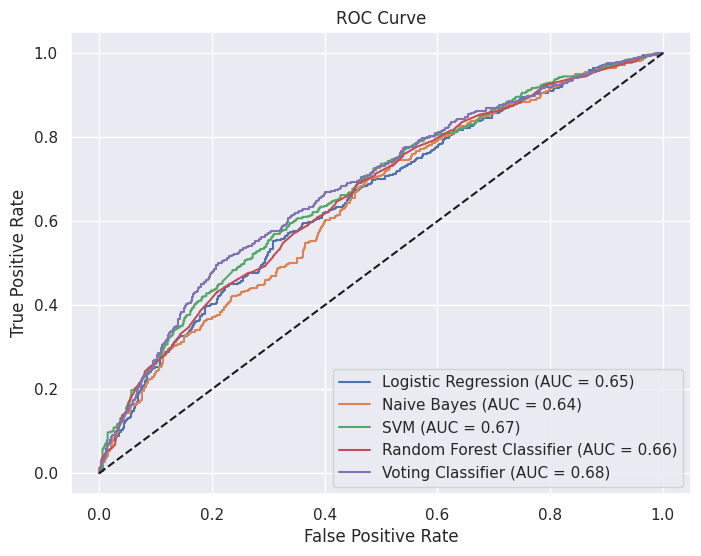

In [ ]:
from sklearn.metrics import roc_curve, auc
X_test_text = [" ".join(row) for row in X_test_tfidf.toarray().astype(str)]

# create a dictionary to store the models and their predicted probabilities
models = {
    'Logistic Regression': logreg.predict_proba(X_test_tfidf)[:, 0],
    'Naive Bayes': nb.predict_proba(X_test_tfidf)[:, 0],
    'SVM': svm.predict_proba(X_test_tfidf)[:, 0],
    'Random Forest Classifier': rf.predict_proba(X_test_tfidf)[:, 0],
    'Voting Classifier': vc.predict_proba(X_test)[:, 0]
}

# plot the ROC curve for each model
plt.figure(figsize=(8, 6))
for name, preds in models.items():
    fpr, tpr, threshold = roc_curve(y_test, preds, pos_label='false')
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(name, roc_auc))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

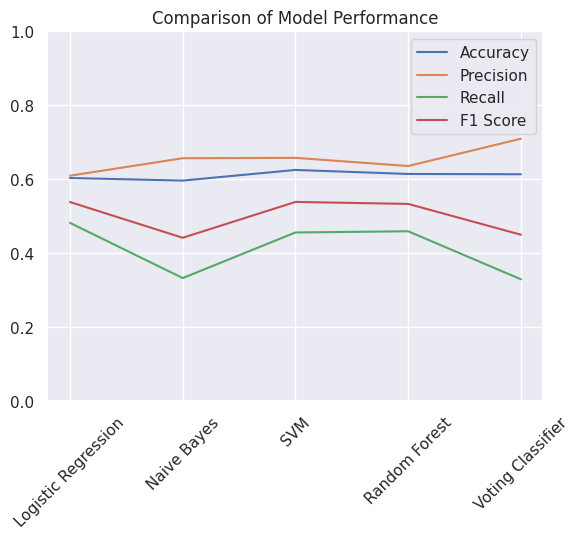

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# create a dictionary to store the metrics for each model
metrics = {
    'Logistic Regression': [accuracy_score(y_test, logreg_pred),
                            precision_score(y_test, logreg_pred, pos_label='false'),
                            recall_score(y_test, logreg_pred, pos_label='false'),
                            f1_score(y_test, logreg_pred, pos_label='false')],
    'Naive Bayes': [accuracy_score(y_test, nb_pred),
                    precision_score(y_test, nb_pred, pos_label='false'),
                    recall_score(y_test, nb_pred, pos_label='false'),
                    f1_score(y_test, nb_pred, pos_label='false')],
    'SVM': [accuracy_score(y_test, svm_pred),
            precision_score(y_test, svm_pred, pos_label='false'),
            recall_score(y_test, svm_pred, pos_label='false'),
            f1_score(y_test, svm_pred, pos_label='false')],
    'Random Forest': [accuracy_score(y_test, rf_pred),
                      precision_score(y_test, rf_pred, pos_label='false'),
                      recall_score(y_test, rf_pred, pos_label='false'),
                      f1_score(y_test, rf_pred, pos_label='false')],
    'Voting Classifier': [accuracy_score(y_test, VC_pred),
                      precision_score(y_test, VC_pred, pos_label='false'),
                      recall_score(y_test, VC_pred, pos_label='false'),
                      f1_score(y_test, VC_pred, pos_label='false')]
}

# create a DataFrame from the metrics dictionary
dfnew = pd.DataFrame.from_dict(metrics, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# plot a line graph of the metrics
plt.plot(dfnew.index, dfnew['Accuracy'], label='Accuracy')
plt.plot(dfnew.index, dfnew['Precision'], label='Precision')
plt.plot(dfnew.index, dfnew['Recall'], label='Recall')
plt.plot(dfnew.index, dfnew['F1 Score'], label='F1 Score')
plt.ylim([0, 1])
plt.legend()
plt.xticks(rotation=45)
plt.title('Comparison of Model Performance')
plt.show()